Pepito analysis

In [5]:
import pandas as pd

tweets = pd.read_json('tweets.json')

In [6]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23564 entries, 0 to 23563
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   full_text   23564 non-null  object             
 1   way         23564 non-null  object             
 2   created_at  23564 non-null  datetime64[ns, UTC]
 3   media       23564 non-null  object             
dtypes: datetime64[ns, UTC](1), object(3)
memory usage: 736.5+ KB


In [7]:
tweets.head()

,full_text,way,created_at,media
0,Pepito est sorti (12:47:41),out,2011-11-13 10:47:15+00:00,
1,Pepito est sorti (17:20:30),out,2011-11-13 15:20:04+00:00,
2,Pepito est sorti (17:35:41),out,2011-11-13 15:35:15+00:00,
3,Pepito est sorti (9:00:05),out,2011-11-14 06:59:37+00:00,
4,Pepito est rentré (9:02:53),in,2011-11-14 07:02:25+00:00,


In [18]:
tweets["created_at"] = pd.to_datetime(tweets["created_at"])
tweets["time_bin"] = tweets["created_at"].dt.floor("30T").dt.time

In [10]:
import matplotlib.pyplot as plt

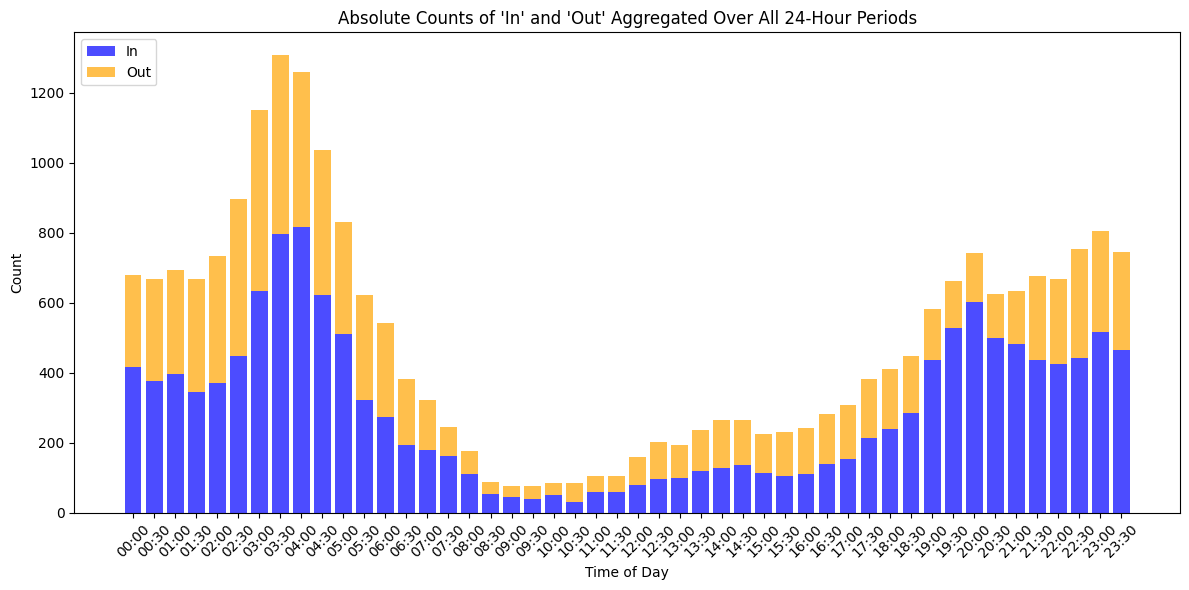

In [19]:

grouped = tweets.groupby(["time_bin", "way"]).size().unstack(fill_value=0)
grouped.index = grouped.index.map(lambda t: t.strftime('%H:%M'))


plt.figure(figsize=(12, 6))
plt.bar(grouped.index, grouped["in"], label="In", color="blue", alpha=0.7)
plt.bar(grouped.index, grouped["out"], label="Out", color="orange", alpha=0.7, bottom=grouped["in"])
plt.title("Absolute Counts of 'In' and 'Out' Aggregated Over All 24-Hour Periods")
plt.xlabel("Time of Day")
plt.ylabel("Count")
plt.legend(loc="upper left")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [20]:
durations = []
last_out_time = None

for _, row in tweets.iterrows():
    if row["way"] == "out":
        last_out_time = row["created_at"]
    elif row["way"] == "in" and last_out_time is not None:
        # Calculate the time difference in minutes
        duration = (row["created_at"] - last_out_time).total_seconds() / 60
        durations.append(duration)
        last_out_time = None  # Reset after pairing

average_duration = sum(durations) / len(durations) if durations else 0

print(f"Average time Pepito spends outside: {average_duration:.2f} minutes")

Average time Pepito spends outside: 149.90 minutes


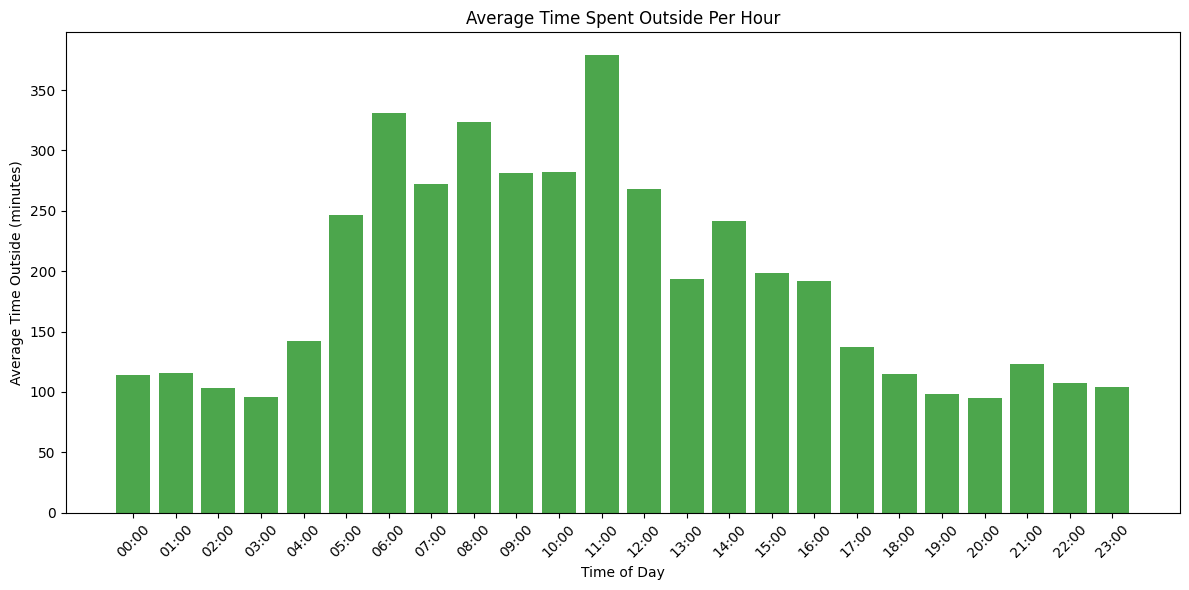

In [22]:
durations = []
time_bins = []
last_out_time = None

for _, row in tweets.iterrows():
    if row["way"] == "out":
        last_out_time = row["created_at"]
    elif row["way"] == "in" and last_out_time is not None:
        # Calculate the time difference in minutes
        duration = (row["created_at"] - last_out_time).total_seconds() / 60
        time_bin = last_out_time.floor("60T").time()  # Bin based on the "out" event
        durations.append((time_bin, duration))
        last_out_time = None  # Reset after pairing

# Create a DataFrame for durations
durations_df = pd.DataFrame(durations, columns=["time_bin", "duration"])

# Group by time_bin and calculate the average duration
average_durations = durations_df.groupby("time_bin")["duration"].mean()

# Convert time_bin to strings for plotting
average_durations.index = average_durations.index.map(lambda t: t.strftime('%H:%M'))

# Plot the average time outside
plt.figure(figsize=(12, 6))
plt.bar(
    average_durations.index,
    average_durations,
    color="green",
    alpha=0.7
)
plt.title("Average Time Spent Outside Per Hour")
plt.xlabel("Time of Day")
plt.ylabel("Average Time Outside (minutes)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\Duarte\AppData\Local\Temp\ipykernel_16256\1900296750.py:4: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  tweets["week"] = tweets["created_at"].dt.to_period("W")


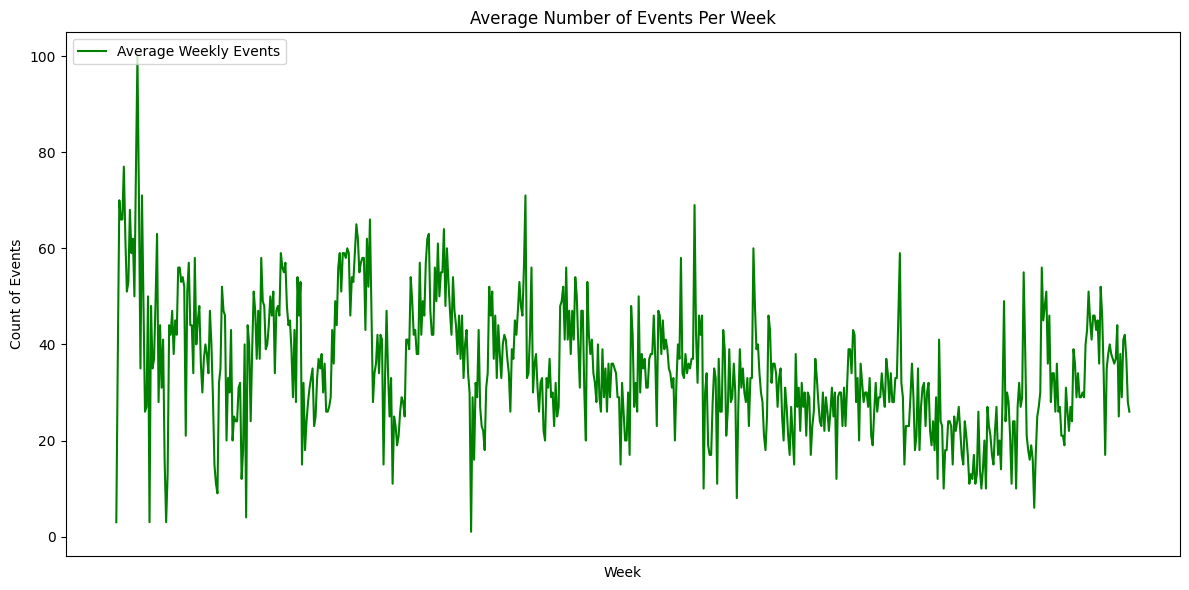

In [30]:
tweets["created_at"] = pd.to_datetime(tweets["created_at"])

# Extract the week of the year and year
tweets["week"] = tweets["created_at"].dt.to_period("W")

# Group by week and count events
weekly_event_counts = tweets.groupby("week").size()

plt.figure(figsize=(12, 6))
plt.plot(
    range(len(weekly_event_counts)),  # Use index positions for the x-axis
    weekly_event_counts,
    label="Average Weekly Events",
    color="green"
)

# Remove x-axis labels and ticks
plt.xticks([])

# Title and labels
plt.title("Average Number of Events Per Week")
plt.xlabel("Week")
plt.ylabel("Count of Events")
plt.legend(loc="upper left")
plt.tight_layout()
plt.show()

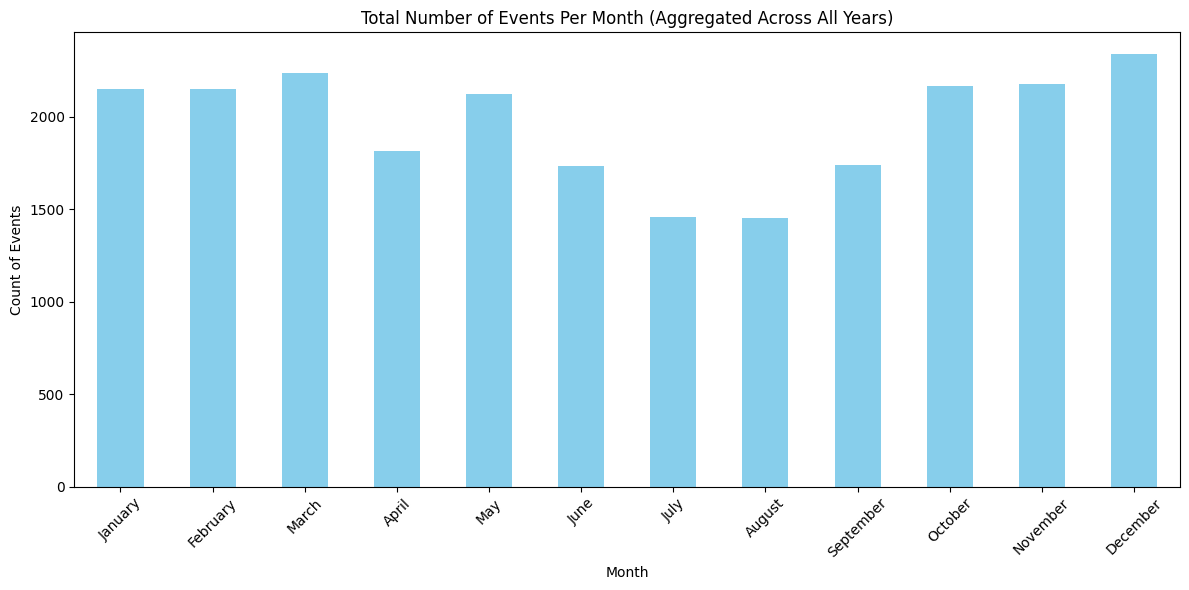

In [34]:

tweets["month"] = tweets["created_at"].dt.month

# Group by month and count events
monthly_event_counts = tweets.groupby("month").size()

# Plot the data as a bar graph
plt.figure(figsize=(12, 6))
monthly_event_counts.plot(kind='bar', color="skyblue")

# Add title and labels
plt.title("Total Number of Events Per Month (Aggregated Across All Years)")
plt.xlabel("Month")
plt.ylabel("Count of Events")

# Set x-axis labels to show the month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 
               'July', 'August', 'September', 'October', 'November', 'December']
plt.xticks(ticks=range(12), labels=month_names, rotation=45)

# Show the plot
plt.tight_layout()
plt.show()